# Redes Neurais & Deep Learning 


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from numpy.linalg import norm
from itertools import product

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
import tensorflow as tf

## Otimizando funções

Função escolhida para comparação dos métodos Ackley N. 2: $f(x_1, x_2) = -200 e^{-0.2 \sqrt{x_1^2 + x_2^2}}$

In [ ]:
x1, x2 = np.meshgrid(np.linspace(-35, 35, 100), np.linspace(-35, 35, 100))
z = -200 * np.exp(-0.2 * np.sqrt(x1**2 + x2**2))

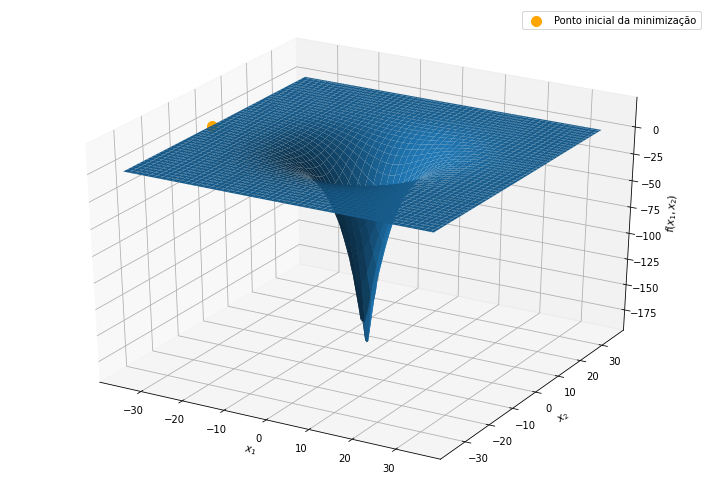

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_surface(x1, x2, z)

ax.scatter(-30, -10, 13, s=100, color='orange', label='Ponto inicial da minimização')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

### Adagrad

In [ ]:
from tensorflow.python.training import adagrad

x1 = tf.Variable([-30.0], name='x1')
x2 = tf.Variable([-10.0], name='x2')

@tf.function
def f():
    return -200 * tf.math.exp(-0.2 * tf.math.sqrt(x1**2 + x2**2))

current_x = np.array([x1.numpy(), x2.numpy()])
next_x = None

steps_adagrad = []

for _ in range(1000):
    
    opt = adagrad.AdagradOptimizer(0.1).minimize(f)

    next_x = np.array([*x1.numpy(), *x2.numpy()])

    if np.allclose(next_x, current_x, rtol=1e-5):
        current_x = next_x
        steps_adagrad.append(current_x)

        print(f'Converged to ({current_x[0]:.3f}, {current_x[1]:.3f}) in {n} steps')
        break
    
    else:
        current_x = next_x
        steps_adagrad.append(current_x)
else:
    print(f'Maximum iteration number was reached with ({current_x[0]:.3f}, {current_x[1]:.3f})')


Maximum iteration number was reached with (0.065, -0.030)


### RMSProp

In [ ]:
from tensorflow.python.training import rmsprop

x1 = tf.Variable([-30.0], name='x1')
x2 = tf.Variable([-10.0], name='x2')

@tf.function
def f():
    return -200 * tf.math.exp(-0.2 * tf.math.sqrt(x1**2 + x2**2))

current_x = np.array([x1.numpy(), x2.numpy()])
next_x = None

steps_rmsprop = []

for _ in range(1000):
    
    opt = rmsprop.RMSPropOptimizer(0.1).minimize(f)

    next_x = np.array([*x1.numpy(), *x2.numpy()])

    if np.allclose(next_x, current_x, rtol=1e-5):
        current_x = next_x
        steps_rmsprop.append(current_x)

        print(f'Converged to ({current_x[0]:.3f}, {current_x[1]:.3f}) in {n} steps')
        break
    
    else:
        current_x = next_x
        steps_rmsprop.append(current_x)
else:
    print(f'Maximum iteration number was reached with ({current_x[0]:.3f}, {current_x[1]:.3f})')


Maximum iteration number was reached with (-0.116, 0.116)


### Adam

In [ ]:
from tensorflow.python.training import adam

x1 = tf.Variable([-30.0], name='x1')
x2 = tf.Variable([-10.0], name='x2')

@tf.function
def f():
    return -200 * tf.math.exp(-0.2 * tf.math.sqrt(x1**2 + x2**2))

current_x = np.array([x1.numpy(), x2.numpy()])
next_x = None

steps_adam = []

for _ in range(1000):
    
    opt = adam.AdamOptimizer(0.1).minimize(f)

    next_x = np.array([*x1.numpy(), *x2.numpy()])

    if np.allclose(next_x, current_x, rtol=1e-5):
        current_x = next_x
        steps_adam.append(current_x)

        print(f'Converged to ({current_x[0]:.3f}, {current_x[1]:.3f}) in {n} steps')
        break
    
    else:
        current_x = next_x
        steps_adam.append(current_x)
else:
    print(f'Maximum iteration number was reached with ({current_x[0]:.3f}, {current_x[1]:.3f})')


Maximum iteration number was reached with (0.000, -0.009)


### Comparação

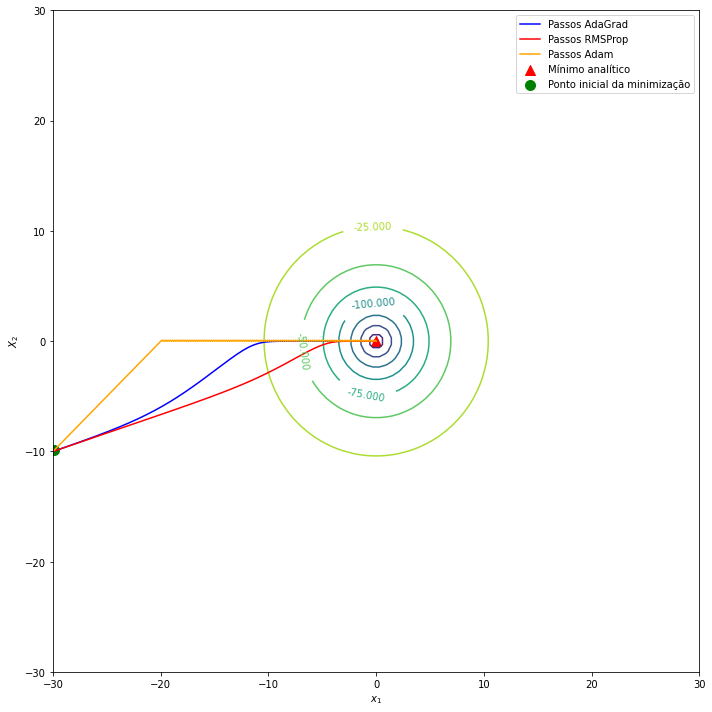

In [ ]:
x1, x2 = np.meshgrid(np.linspace(-30, 30, 100), np.linspace(-30, 30, 100))
z = -200 * np.exp(-0.2 * np.sqrt(x1**2 + x2**2))

fig, ax = plt.subplots(figsize=(10, 10))

contours = ax.contour(x1, x2, z)
ax.clabel(contours, inline=1, fontsize=10)

# Ponto mínimo
ax.scatter(0, 0, marker='^', s=100, color='red', label='Mínimo analítico')

# Passos de otimização
ax.scatter(steps_adam[0][0], steps_adam[0][1], s=100, color='green', label='Ponto inicial da minimização')

ax.plot(
    np.array(steps_adagrad)[:,0], 
    np.array(steps_adagrad)[:,1], 
    color='blue',
    label='Passos AdaGrad'
)

ax.plot(
    np.array(steps_rmsprop)[:,0], 
    np.array(steps_rmsprop)[:,1], 
    color='red',
    label='Passos RMSProp'
)

ax.plot(
    np.array(steps_adam)[:,0], 
    np.array(steps_adam)[:,1], 
    color='orange',
    label='Passos Adam'
)

ax.set(
    xlabel='$x_1$',
    ylabel='$X_2$',
)

plt.legend()
plt.tight_layout()
plt.show()

## Aproximando funções

### $ f(x_1, x_2) = x_1^2 + x_2^2 + 2 x_1 x_2 cos(\pi x_1 x_2) + x_1 + x_2 -1 \quad \|x_1\| \leq 1, \|x_2\| \leq 1 $

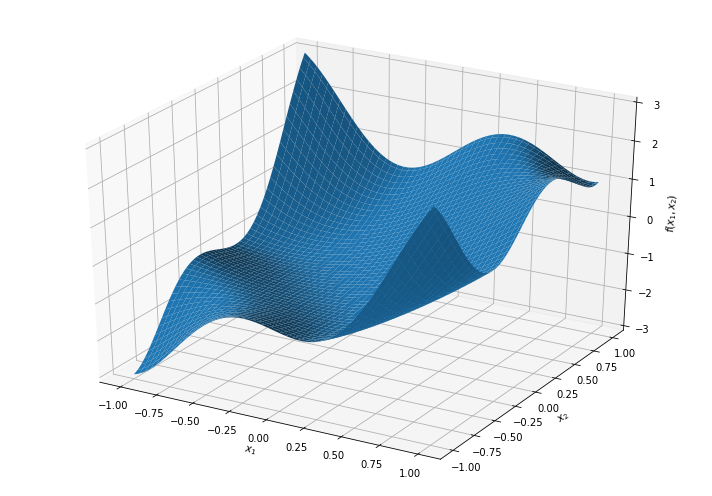

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
z =  x1**2 + x2**2 + 2 * x1 * x2 * np.cos(np.pi * x1 * x2) + x1 + x2 - 1

ax.plot_surface(x1, x2, z)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    z.flatten(), 
    test_size=0.2, 
    random_state=505
)

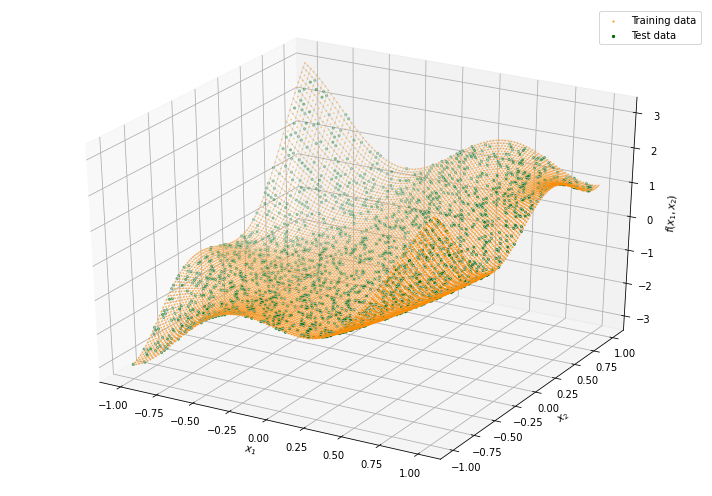

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                192       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 4)                 36        
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-traina

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

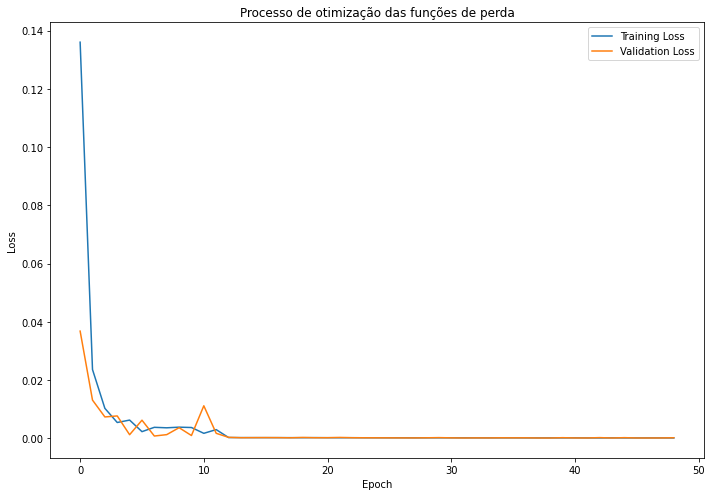

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

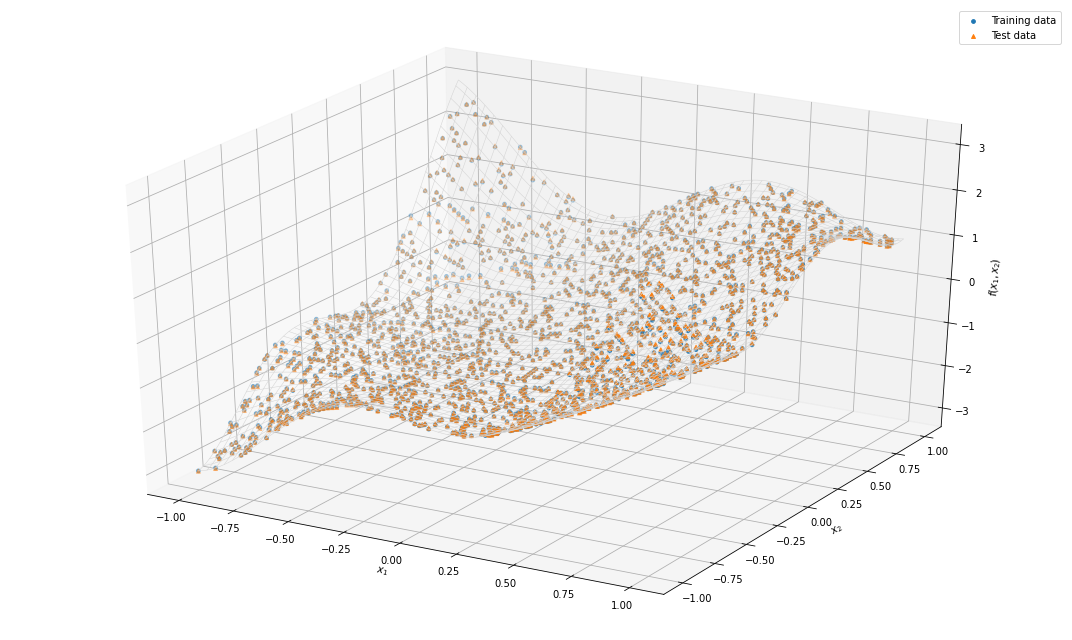

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, z, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

### $ f(x_1, x_2, x_3) = x_1 \oplus x_2 \oplus x_3 $

Tabela verdade:

| $x_1$ | $x_2$ | $x_3$ | $ x_1 \oplus x_2 \oplus x_3 $ |
|:-----:|:-----:|:-----:|:-----------------------------:|
|   0   |   0   |   0   |               0               |
|   0   |   0   |   1   |               1               |
|   0   |   1   |   0   |               1               |
|   0   |   1   |   1   |               0               |
|   1   |   0   |   0   |               1               |
|   1   |   0   |   1   |               0               |
|   1   |   1   |   0   |               0               |
|   1   |   1   |   1   |               1               |

In [ ]:
x = np.array(list(product([0, 1], repeat=3)))

y = np.array(
    [ np.logical_xor(np.logical_xor(x1, x2), x3) for x1, x2, x3 in x ], 
    dtype=int
)

In [ ]:
x_test, y_test = make_blobs(
    n_samples=5000, 
    centers=x, 
    cluster_std=0.09,
    n_features=3,
    random_state=42
)

test_map = {
    0: 0, 
    1: 1, 
    2: 1, 
    3: 0, 
    4: 1, 
    5: 0, 
    6: 0, 
    7: 1
}

y_test = [ test_map[label] for label in y_test ]

In [ ]:
mlp = Sequential([
    Dense(8, activation='relu', input_shape=(3,)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = mlp.fit(
    x, y,
    batch_size=1,
    epochs=1000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

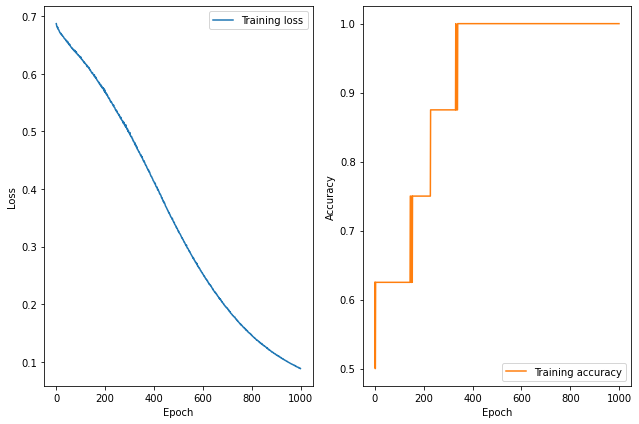

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 6))

ax[0].plot(history.history['loss'], label='Training loss')

ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)
ax[0].legend()

ax[1].plot(history.history['acc'], color='C1',label='Training accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = 0.6

y_pred = [ 1 if pred >= threshold else 0 for pred in mlp.predict(x_test) ] 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2500
           1       0.98      0.76      0.85      2500

    accuracy                           0.87      5000
   macro avg       0.89      0.87      0.87      5000
weighted avg       0.89      0.87      0.87      5000



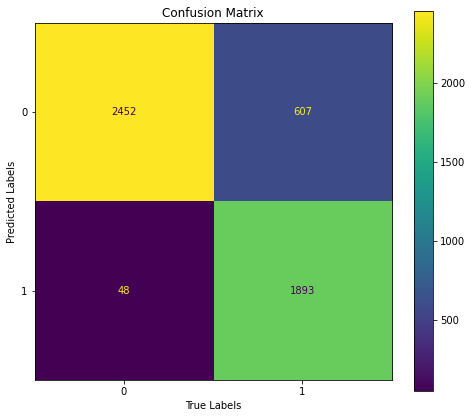

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))

ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test, labels=[0, 1]),
    display_labels=['0', '1']
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.show()

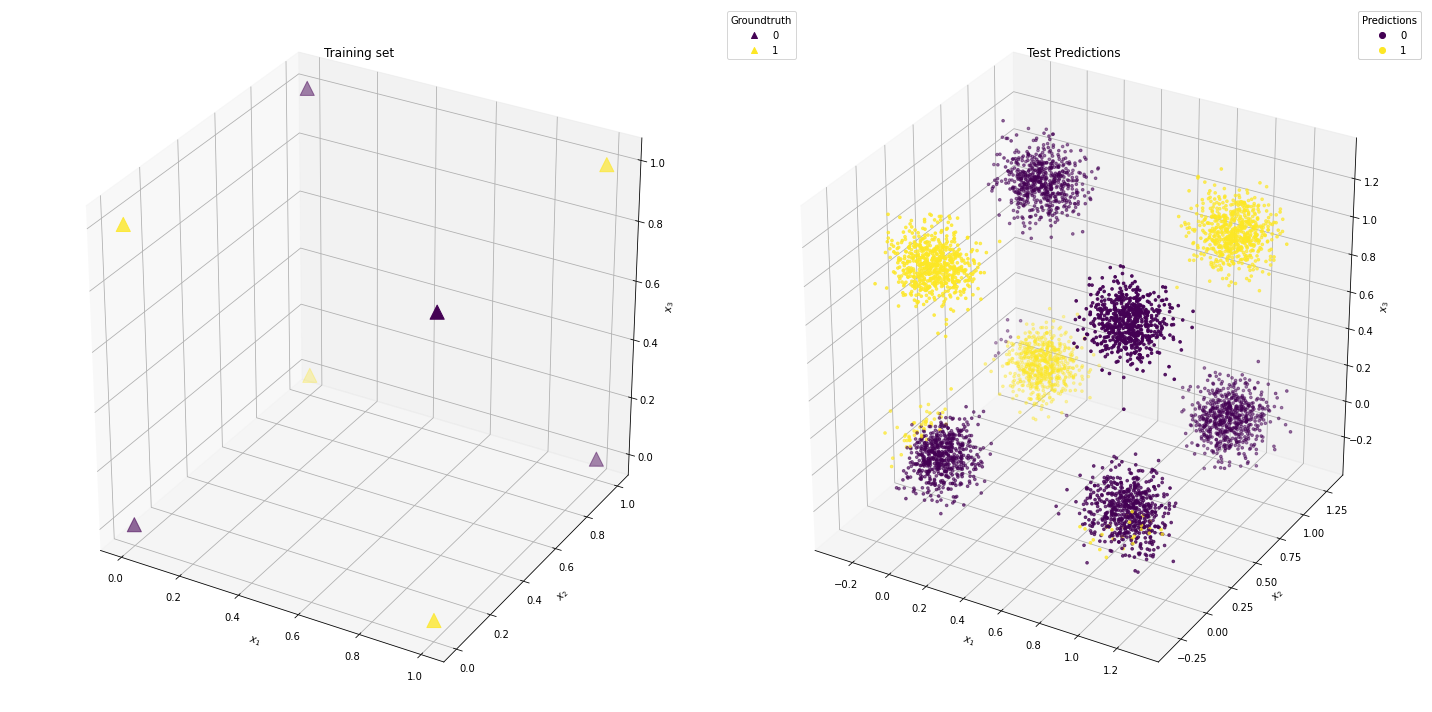

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10), subplot_kw=dict(projection='3d'))


gt_scatter = ax[0].scatter(x[:,0], x[:,1], x[:,2], marker='^', c=y, s=200)
ax[0].set(
    title='Training set',
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$x_3$'
)

pred_scatter = ax[1].scatter(x_test[:,0], x_test[:,1], x_test[:,2],  s=7, c=y_pred)
ax[1].set(
    title='Test Predictions',
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$x_3$'
)

gt_legend = plt.legend(handles=gt_scatter.legend_elements()[0], labels=['0', '1'], title='Groundtruth', loc='upper left')
plt.gca().add_artist(gt_legend)

pred_legend = plt.legend(handles=pred_scatter.legend_elements()[0], labels=['0', '1'], title='Predictions', loc='upper right')
plt.gca().add_artist(pred_legend)

plt.tight_layout()
plt.show()

## Classificação

### Interseção de semicírculos

In [ ]:
def c1(x, y):
    return (x + 1)**2 + y**2 <= 1

def c2(x, y):
    return (x - 1)**2 + y**2 <= 1

def c3(x, y):
    return x**2 + (y + 1)**2 <= 1

def c4(x, y):
    return x**2 + (y - 1)**2 <= 1

In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))
labels = np.array([ 
    1 if sum([c1(x_i, y_i), c2(x_i, y_i), c3(x_i, y_i), c4(x_i, y_i),]) >= 2
    else 0
    for x_i, y_i in points 
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)

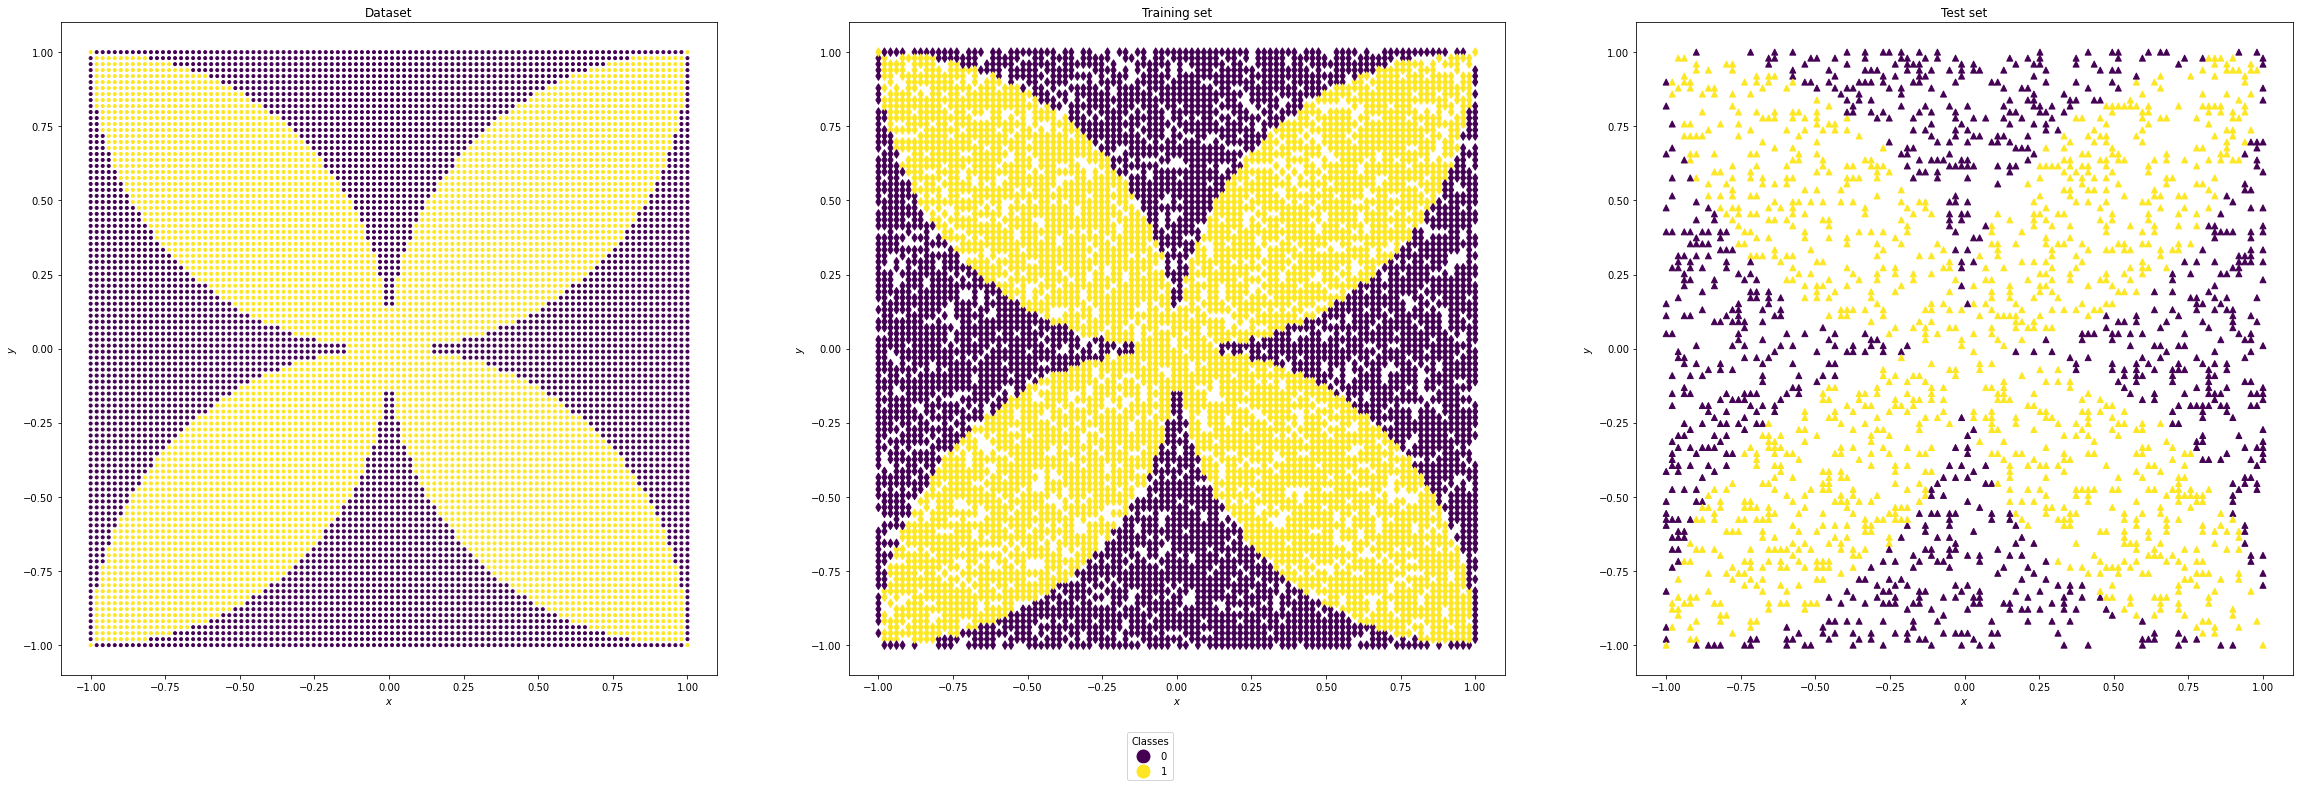

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=labels, marker='.')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=y_train, marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=y_test, marker='^')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(68/255, 1/255, 84/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(253/255, 231/255, 37/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1'],
    loc='lower center',
    title='Classes'
)

plt.show()

In [ ]:
mlp = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                96        
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = mlp.fit(
    x_train, y_train.reshape((-1,1)),
    validation_split=0.1,
    batch_size=10,
    epochs=2000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

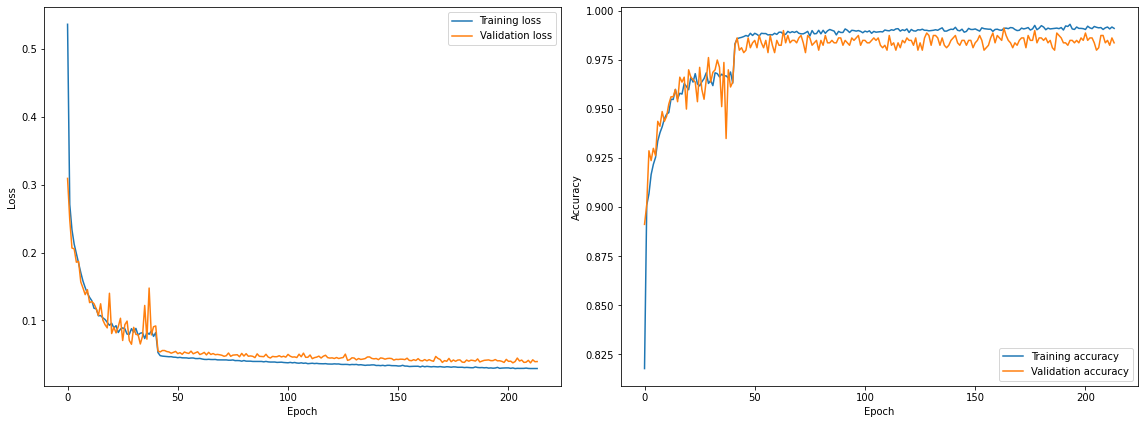

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
threshold = 0.6

y_pred = [ 1 if pred >= threshold else 0 for pred in mlp.predict(x_test) ] 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       883
           1       1.00      0.97      0.98      1117

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



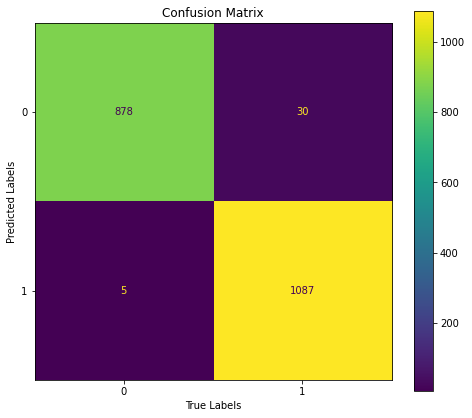

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))

ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test, labels=[0, 1]),
    display_labels=['0', '1']
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.show()

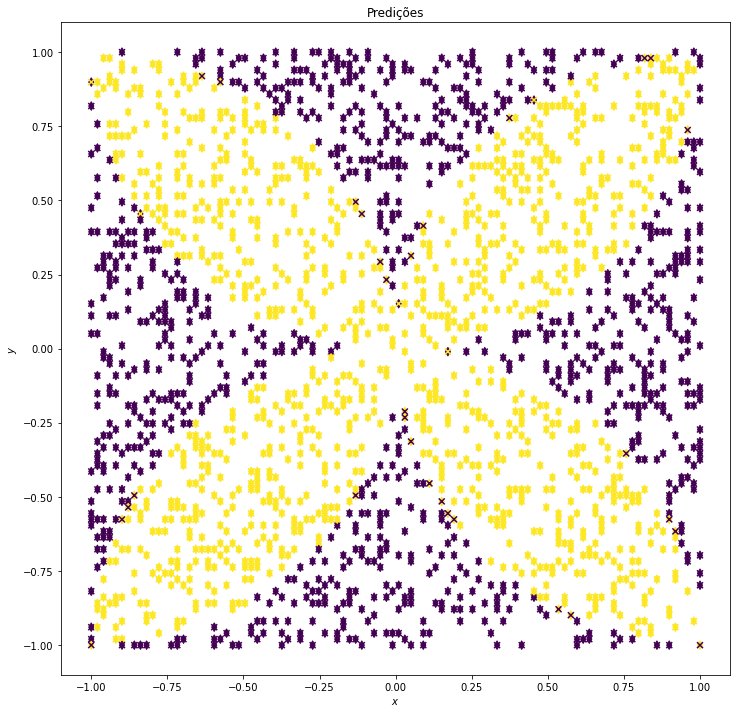

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='d')

ax.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='x')

ax.set(
    title='Predições',
    xlabel='$x$',
    ylabel='$y$'
)


plt.show()

### Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

mlb = MultiLabelBinarizer()

y_train = mlb.fit_transform(y_train.reshape((-1,1)))

label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}


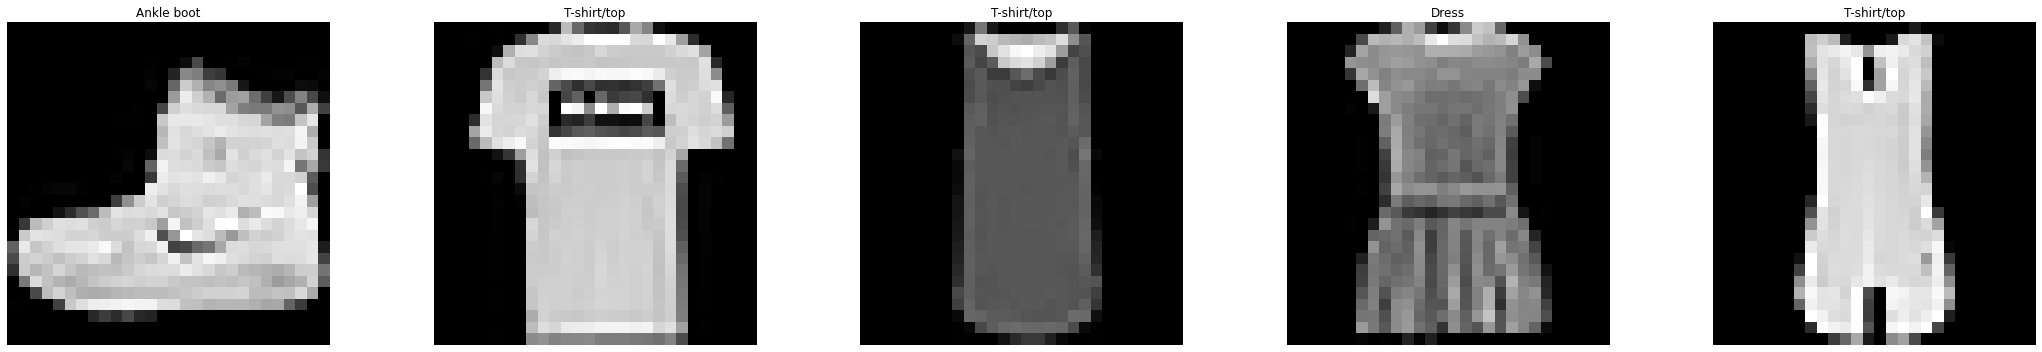

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 5))

for idx, image in enumerate(x_train[:5]):

    ax[idx].imshow(image, cmap='gray')
    ax[idx].axis('off')

    ax[idx].set_title(f'{label_map[np.argmax(y_train[idx])]}')

plt.tight_layout()
plt.show()

In [ ]:
mlp = Sequential([
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.15),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

mlp.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

mlp.build((None, 28*28))

mlp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [ ]:
history = mlp.fit(
    x_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=2000,
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

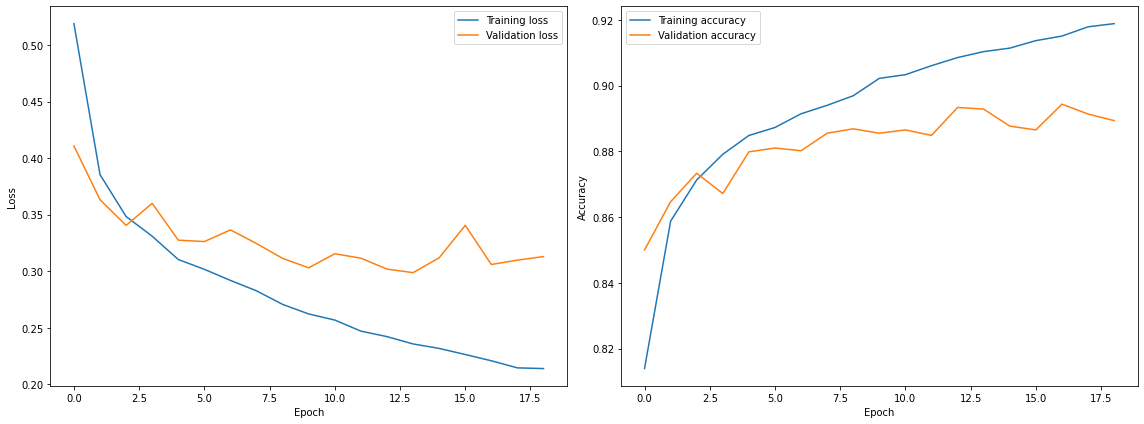

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = [ np.argmax(pred) for pred in mlp.predict(x_test) ] 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.97      0.98      0.98      1000
           2       0.78      0.83      0.81      1000
           3       0.89      0.90      0.89      1000
           4       0.77      0.85      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.76      0.66      0.70      1000
           7       0.96      0.90      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.90      0.98      0.94      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



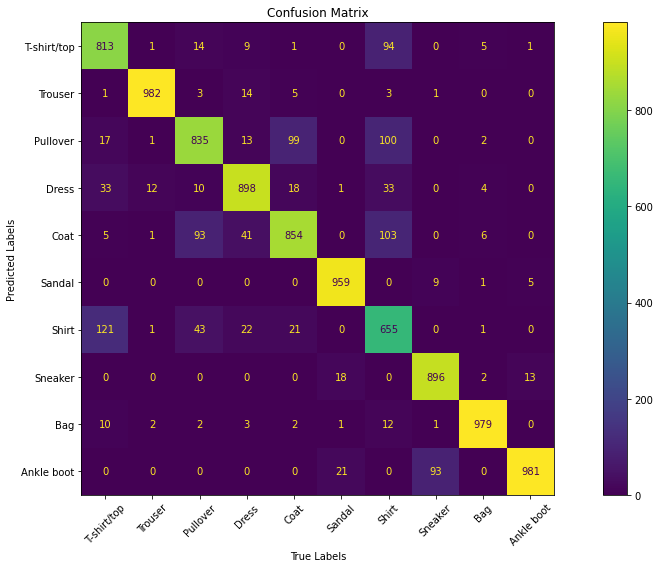

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test, labels=list(label_map.keys())),
    display_labels=label_map.values()
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

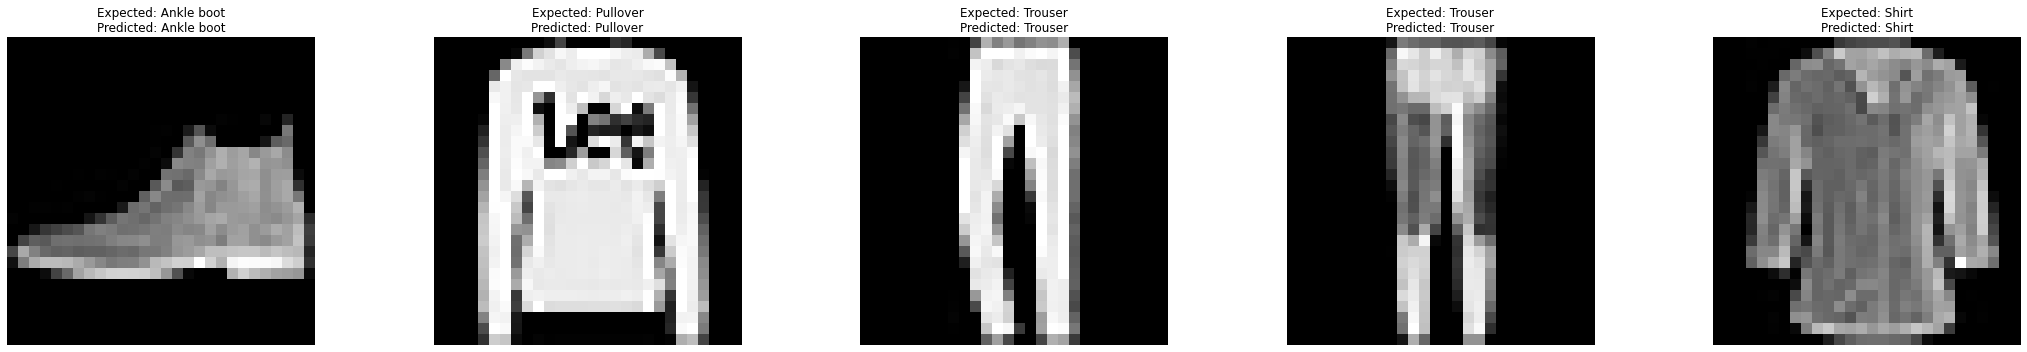

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 5))

for idx, image in enumerate(x_test[:5]):

    ax[idx].imshow(image, cmap='gray')
    ax[idx].axis('off')

    ax[idx].set_title(f'Expected: {label_map[y_test[idx]]}\nPredicted: {label_map[y_pred[idx]]}')

plt.tight_layout()
plt.show()

#### Utilizando autoencoders

In [ ]:
class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        
        self.latent_dim = latent_dim   
        
        self.encoder = tf.keras.Sequential([
            Flatten(),
            Dense(1024, activation='relu'),
            Dropout(0.1),
            Dense(latent_dim, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            Dense(1024, activation='relu'),
            Dropout(0.1),
            Dense(784, activation='sigmoid'),
            Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

In [ ]:
autoencoder = Autoencoder(100)

autoencoder.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

In [ ]:
autoencoder.fit(
    x_train, x_train,
    validation_split=0.1,
    batch_size=64,
    epochs=100,
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)


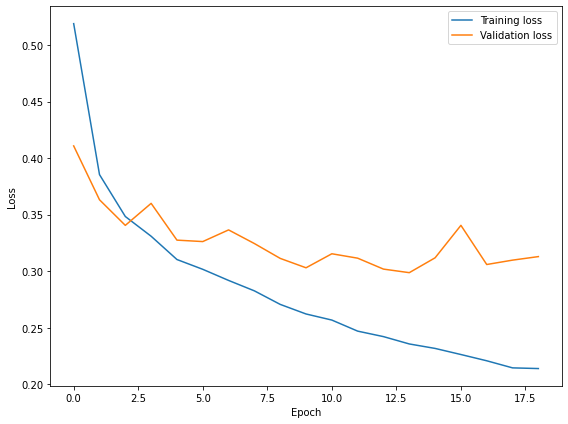

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')

ax.legend()
ax.set(
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
encoded_train_imgs = autoencoder.encoder(x_train).numpy()

encoded_test_imgs = autoencoder.encoder(x_test).numpy()
decoded_test_imgs = autoencoder.decoder(encoded_test_imgs).numpy()

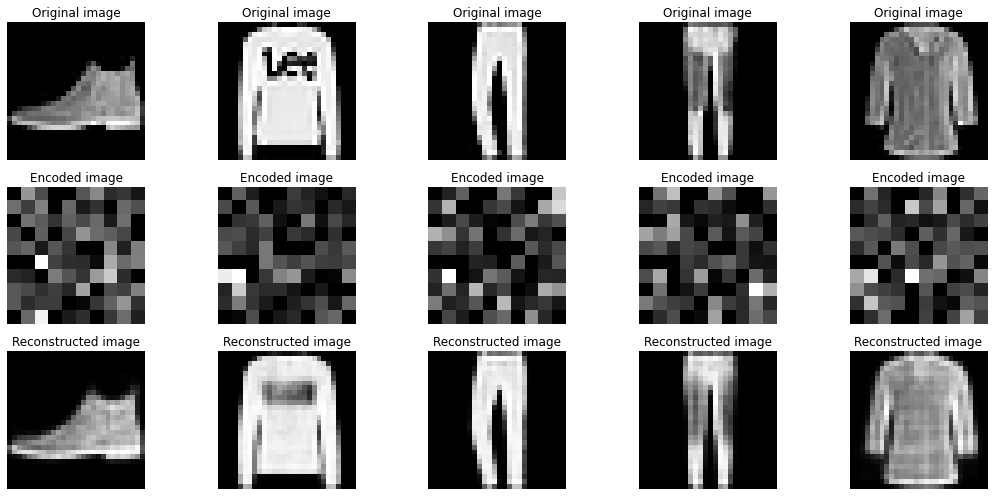

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(15, 7))

for idx in range(5):
    # Original image
    ax[0][idx].imshow(x_test[idx], cmap='gray')

    ax[0][idx].set_title('Original image')
    
    ax[0][idx].axis('off')

    #Encoded imgae
    ax[1][idx].imshow(encoded_test_imgs[idx].reshape(10, 10), cmap='gray')

    ax[1][idx].set_title('Encoded image')
    
    ax[1][idx].axis('off')


    # Reconstructed image
    ax[2][idx].imshow(decoded_test_imgs[idx], cmap='gray')

    ax[2][idx].set_title('Reconstructed image')
    
    ax[2][idx].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(100,)),
    Dropout(0.1),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

mlp.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

mlp.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 256)               25856     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 10)                2570      
                                                                 
Total params: 94,218
Trainable params: 94,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = mlp.fit(
    encoded_train_imgs, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=2000,
    shuffle=True,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

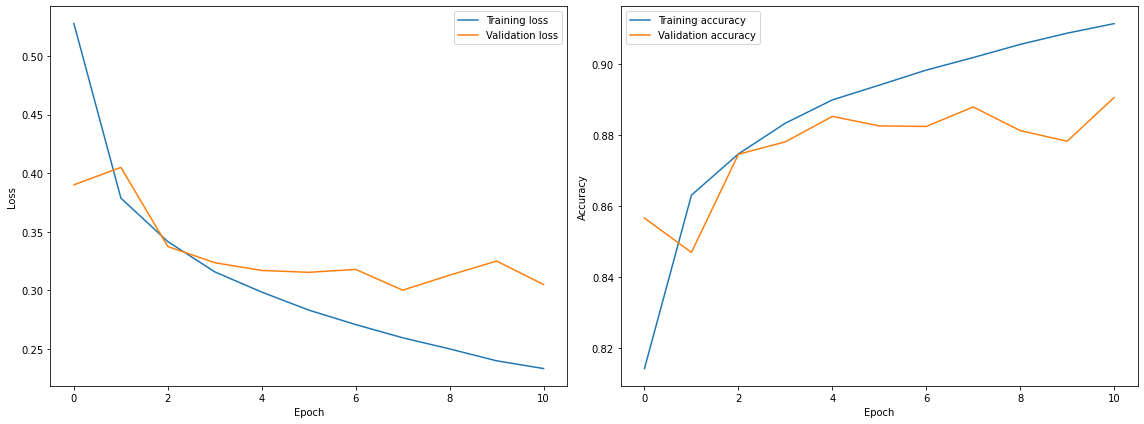

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = [ np.argmax(pred) for pred in mlp.predict(encoded_test_imgs) ] 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.84      0.77      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.70      0.73      0.71      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



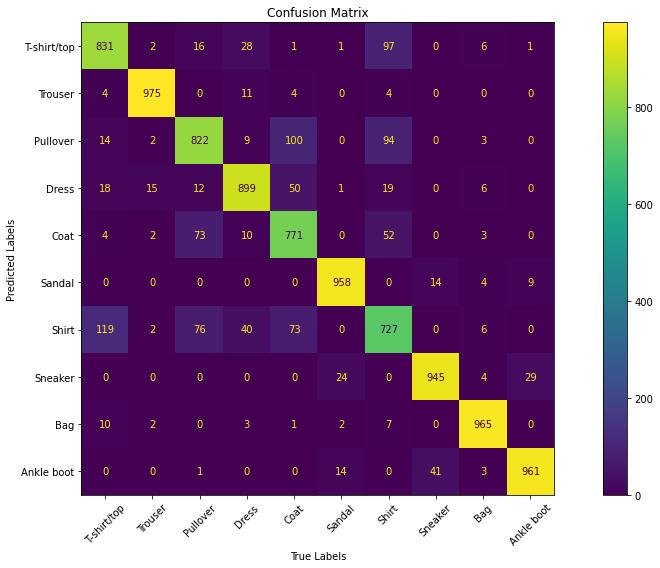

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test, labels=list(label_map.keys())),
    display_labels=label_map.values()
).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

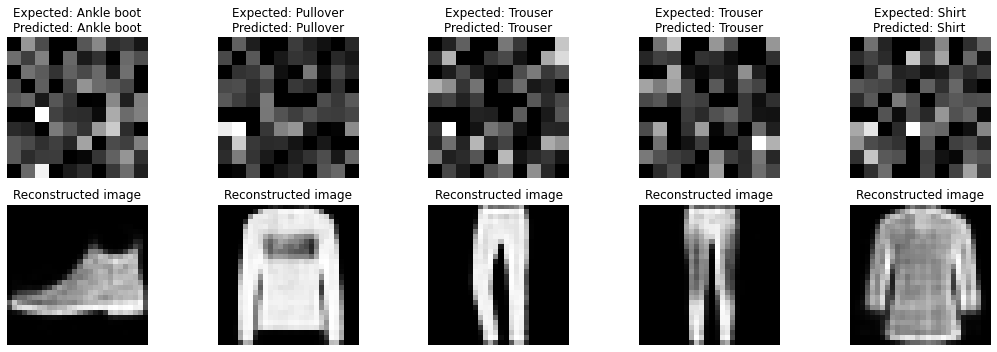

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

for idx in range(5):
    # Original image
    ax[0][idx].imshow(encoded_test_imgs[idx].reshape(10, 10), cmap='gray')

    ax[0][idx].set_title(f'Expected: {label_map[y_test[idx]]}\nPredicted: {label_map[y_pred[idx]]}')
    
    ax[0][idx].axis('off')

    # Reconstructed image
    ax[1][idx].imshow(decoded_test_imgs[idx], cmap='gray')

    ax[1][idx].set_title('Reconstructed image')
    
    ax[1][idx].axis('off')

plt.tight_layout()
plt.show()


##### Gerando imagens

In [ ]:
random_encoded = np.random.uniform(low=0, high=3, size=(5, 100))

random_decoded = autoencoder.decoder(random_encoded).numpy()

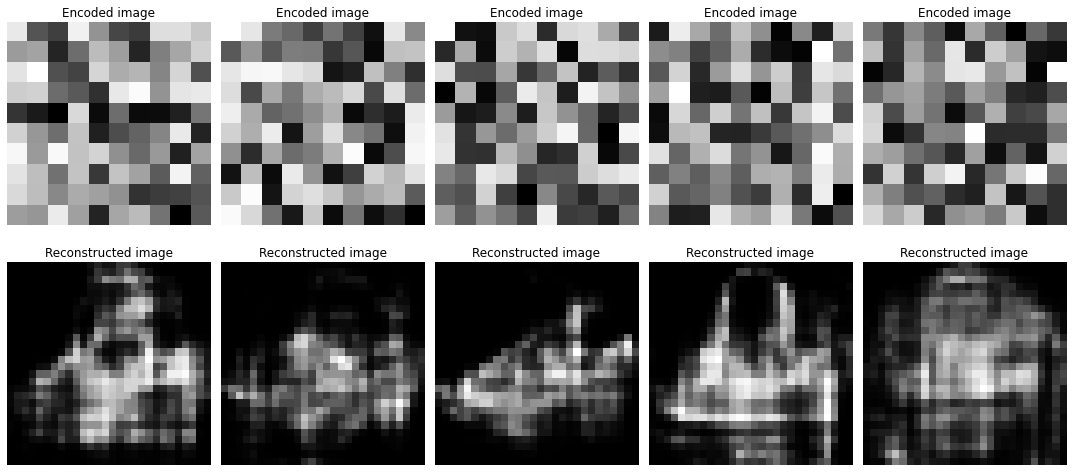

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for idx in range(5):

    #Encoded imgae
    ax[0][idx].imshow(random_encoded[idx].reshape(10, 10), cmap='gray')

    ax[0][idx].set_title('Encoded image')
    
    ax[0][idx].axis('off')


    # Reconstructed image
    ax[1][idx].imshow(random_decoded[idx], cmap='gray')

    ax[1][idx].set_title('Reconstructed image')
    
    ax[1][idx].axis('off')

plt.tight_layout()
plt.show()
